# Early Stage Diabetes Detection - Case study

### About Data
This dataset contains the sign and symptpom data of newly diabetic or would be diabetic patient.This has been collected using direct questionnaires from the patients of Sylhet Diabetes Hospital in Sylhet, Bangladesh and approved by a doctor.

#### Features of the dataset
The dataset consist of total **15** features and one target variable named class.

**1. Age:** Age in years ranging from (20years to 65 years)<br>
**2. Gender:** Male / Female<br>
**3. Polyuria:** Yes / No<br>
**4. Polydipsia:** Yes/ No<br>
**5. Sudden weight loss:** Yes/ No <br>
**6. Weakness:** Yes/ No<br>
**7. Polyphagia:** Yes/ No<br>
**8. Genital Thrush:** Yes/ No<br>
**9. Visual blurring:** Yes/ No<br>
**10. Itching:** Yes/ No<br>
**11. Irritability:** Yes/No<br>
**12. Delayed healing:** Yes/ No<br>
**13. Partial Paresis:** Yes/ No<br>
**14. Muscle stiffness:** yes/ No<br>
**15. Alopecia:** Yes/ No<br>
**16. Obesity:** Yes/ No<br>

**Class:** Positive / Negative

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

0 means no
1 means yes

In [2]:
df = pd.read_csv('diabetes_data.csv',sep=';')
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


### Checking Missing Values

In [3]:
df.isna().sum()

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

### Distribution of Target Variable

<AxesSubplot:xlabel='class', ylabel='count'>

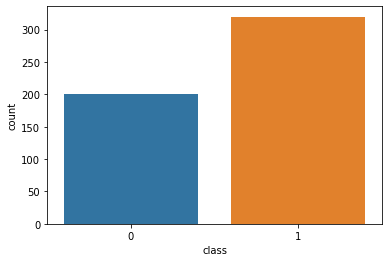

In [5]:
import seaborn as sns

sns.countplot(df['class'],data=df)

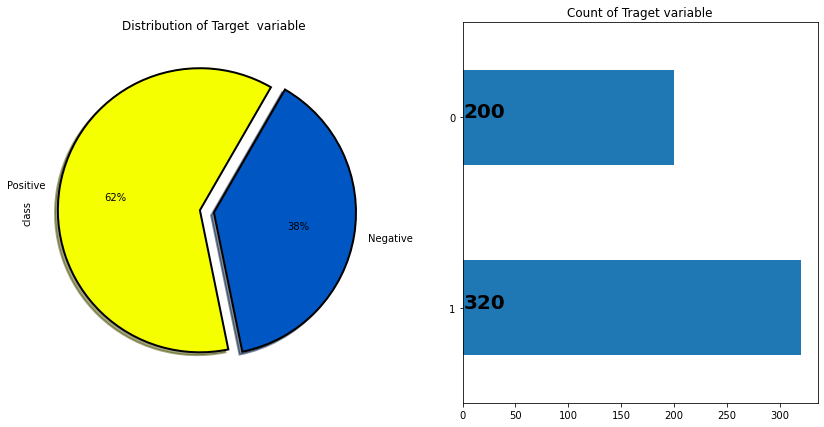

In [6]:
# plotting to create pie chart and bar plot as subplots
plt.figure(figsize=(14,7))
plt.subplot(121)
df["class"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["Positive","Negative"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of Target  variable")

plt.subplot(122)
ax = df["class"].value_counts().plot(kind="barh")

for i,j in enumerate(df["class"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of Traget variable")
plt.show()

### Distribution of Gender

<AxesSubplot:xlabel='gender', ylabel='count'>

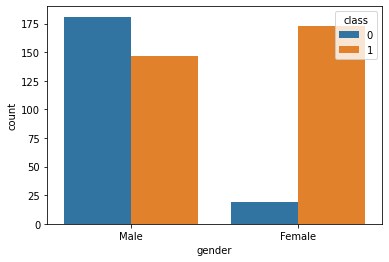

In [7]:
import seaborn as sns

sns.countplot(df['gender'],hue=df['class'], data=df)

In [8]:
 plot_criteria= ['gender', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,0,1
gender,,
Female,9.500000,54.060000
Male,90.500000,45.940000


In [9]:
plot_criteria= ['sudden_weight_loss', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,0,1
sudden_weight_loss,,
0,85.500000,41.250000
1,14.500000,58.750000


### Distribution of weakness

In [10]:
plot_criteria= ['weakness', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,0,1
weakness,,
0,56.500000,31.870000
1,43.500000,68.120000


Polyphagia, also known as hyperphagia, is the medical term for excessive or extreme hunger. 

It's different than having an increased appetite after exercise or other physical activity. 

While your hunger level will return to normal after eating in those cases, polyphagia won't go away if you eat more food.

In [11]:
plot_criteria= ['polyphagia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,0,1
polyphagia,,
0,76.000000,40.940000
1,24.000000,59.060000


### Distribution of genital thrush

Thrush (or candidiasis) is a common condition caused by a type of yeast called Candida. It mainly affects the vagina, though may affect the penis too, and can be irritating and painful.

Many types of yeast and bacteria naturally live in the vagina and rarely cause problems. Candida is a yeast-like fungus that lives in warm, moist places such as the mouth, bowel, vagina and the foreskin of the penis. Thrush is caused when there is an overgrowth of Candida.

In [12]:
df.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [13]:
plot_criteria= ['genital_thrush', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,0,1
genital_thrush,,
0,83.500000,74.060000
1,16.500000,25.940000


### Distribution of Visual Blurring

In [14]:
plot_criteria= ['visual_blurring', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,0,1
visual_blurring,,
0,71.000000,45.310000
1,29.000000,54.690000


### Itching

In [15]:
plot_criteria= ['itching', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,0,1
itching,,
0,50.500000,51.880000
1,49.500000,48.120000


### Irritability

In [16]:
plot_criteria= ['irritability', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,0,1
irritability,,
0,92.000000,65.620000
1,8.000000,34.380000


### Delayed Healing

In [17]:
plot_criteria= ['delayed_healing', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,0,1
delayed_healing,,
0,57.000000,52.190000
1,43.000000,47.810000


### Partial Paresis

Paresis involves the weakening of a muscle or group of muscles. It may also be referred to as partial or mild paralysis. Unlike paralysis, people with paresis can still move their muscles. These movements are just weaker than normal.

In [18]:
plot_criteria= ['partial_paresis', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,0,1
partial_paresis,,
0,84.000000,40.000000
1,16.000000,60.000000


### Muscle Stiffness

In [19]:
plot_criteria= ['muscle_stiffness', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,0,1
muscle_stiffness,,
0,70.000000,57.810000
1,30.000000,42.190000


### Alopecia

Sudden hair loss that starts with one or more circular bald patches that may overlap.
Alopecia areata occurs when the immune system attacks hair follicles and may be brought on by severe stress.
The main symptom is hair loss.

In [20]:
plot_criteria= ['alopecia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,0,1
alopecia,,
0,49.500000,75.620000
1,50.500000,24.380000


### Obesity

In [21]:
plot_criteria= ['obesity', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,0,1
obesity,,
0,86.500000,80.940000
1,13.500000,19.060000


### Data pre-processing

In [22]:
#df['class'] = df['class'].apply(lambda x: 0 if x=='Negative' else 1)

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['gender']=le.fit_transform(df['gender'])

In [24]:
X=df.drop(['class'],axis=1)
y=df['class']

In [25]:
# Oversample with SMOTE and random undersample for imbalanced dataset

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
# define pipeline
over = SMOTE(random_state=10000)

steps = [('over', over)]

pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)

In [26]:
df=pd.concat([X,y],axis=1)

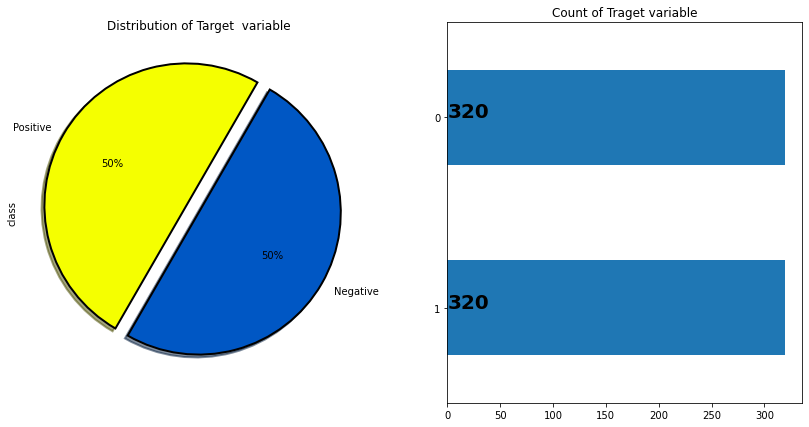

In [27]:
# plotting to create pie chart and bar plot as subplots
plt.figure(figsize=(14,7))
plt.subplot(121)
df["class"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["Positive","Negative"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of Target  variable")

plt.subplot(122)
ax = df["class"].value_counts().plot(kind="barh")

for i,j in enumerate(df["class"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of Traget variable")
plt.show()

In [28]:
df.to_csv('final.csv')

In [29]:
!pip install h2o

In [30]:
import h2o

In [31]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,5 days 22 hours 29 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.4
H2O_cluster_version_age:,"21 days, 21 hours and 33 minutes"
H2O_cluster_name:,H2O_from_python_Samuel_o7knhp
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.572 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [32]:
from h2o.automl import H2OAutoML

In [33]:
data = h2o.import_file("final.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [34]:
 # split into train and validation sets
train, valid = data.split_frame(ratios = [.8], seed = 1234)

In [35]:
x = train.columns
y = "class"
x.remove(y)

In [36]:
train[y] = train[y].asfactor()
valid[y] = valid[y].asfactor()

In [37]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_models = 20, seed = 12)
aml.train(x =x, y = y, training_frame = train, validation_frame=valid)

AutoML progress: |█
14:55:12.380: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
14:55:12.410: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid_1_AutoML_2_20220825_145512_model_5


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,255.0,255.0,95325.0,5.0,12.0,8.819608,18.0,28.0,24.988235




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 3.996606030556619e-12
RMSE: 1.999151327577935e-06
LogLoss: 5.134909633376674e-07
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9999757078919529: 


,,0,1,Error,Rate
0,0,252.0,0.0,0.0,(0.0/252.0)
1,1,0.0,260.0,0.0,(0.0/260.0)
2,Total,252.0,260.0,0.0,(0.0/512.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,9.999757e-01,1.000000,154.0
1,max f2,9.999757e-01,1.000000,154.0
2,max f0point5,9.999757e-01,1.000000,154.0
3,max accuracy,9.999757e-01,1.000000,154.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,9.999757e-01,1.000000,154.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,9.999757e-01,1.000000,154.0
8,max min_per_class_accuracy,9.999757e-01,1.000000,154.0
9,max mean_per_class_accuracy,9.999757e-01,1.000000,154.0



Gains/Lift Table: Avg response rate: 50.78 %, avg score: 50.78 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011719,1.000000e+00,1.969231,1.969231,1.000000,1.000000e+00,1.000000,1.000000,0.023077,0.023077,96.923077,96.923077,0.023077
1,2,0.021484,1.000000e+00,1.969231,1.969231,1.000000,1.000000e+00,1.000000,1.000000,0.019231,0.042308,96.923077,96.923077,0.042308
2,3,0.031250,1.000000e+00,1.969231,1.969231,1.000000,1.000000e+00,1.000000,1.000000,0.019231,0.061538,96.923077,96.923077,0.061538
3,4,0.041016,1.000000e+00,1.969231,1.969231,1.000000,1.000000e+00,1.000000,1.000000,0.019231,0.080769,96.923077,96.923077,0.080769
4,5,0.050781,1.000000e+00,1.969231,1.969231,1.000000,1.000000e+00,1.000000,1.000000,0.019231,0.100000,96.923077,96.923077,0.100000
5,6,0.101562,1.000000e+00,1.969231,1.969231,1.000000,1.000000e+00,1.000000,1.000000,0.100000,0.200000,96.923077,96.923077,0.200000
6,7,0.150391,1.000000e+00,1.969231,1.969231,1.000000,1.000000e+00,1.000000,1.000000,0.096154,0.296154,96.923077,96.923077,0.296154
7,8,0.201172,1.000000e+00,1.969231,1.969231,1.000000,1.000000e+00,1.000000,1.000000,0.100000,0.396154,96.923077,96.923077,0.396154
8,9,0.300781,1.000000e+00,1.969231,1.969231,1.000000,1.000000e+00,1.000000,1.000000,0.196154,0.592308,96.923077,96.923077,0.592308
9,10,0.400391,9.999998e-01,1.969231,1.969231,1.000000,9.999999e-01,1.000000,1.000000,0.196154,0.788462,96.923077,96.923077,0.788462




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 1.8901575491376075e-05
RMSE: 0.004347594218803783
LogLoss: 0.00045142923685749384
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.997006481758634: 


,,0,1,Error,Rate
0,0,68.0,0.0,0.0,(0.0/68.0)
1,1,0.0,60.0,0.0,(0.0/60.0)
2,Total,68.0,60.0,0.0,(0.0/128.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,9.970065e-01,1.000000,59.0
1,max f2,9.970065e-01,1.000000,59.0
2,max f0point5,9.970065e-01,1.000000,59.0
3,max accuracy,9.970065e-01,1.000000,59.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,9.970065e-01,1.000000,59.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,9.970065e-01,1.000000,59.0
8,max min_per_class_accuracy,9.970065e-01,1.000000,59.0
9,max mean_per_class_accuracy,9.970065e-01,1.000000,59.0



Gains/Lift Table: Avg response rate: 46.88 %, avg score: 46.91 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.015625,1.000000e+00,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.033333,0.033333,113.333333,113.333333,0.033333
1,2,0.023438,1.000000e+00,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.016667,0.050000,113.333333,113.333333,0.050000
2,3,0.031250,1.000000e+00,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.016667,0.066667,113.333333,113.333333,0.066667
3,4,0.046875,1.000000e+00,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.033333,0.100000,113.333333,113.333333,0.100000
4,5,0.054688,1.000000e+00,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.016667,0.116667,113.333333,113.333333,0.116667
5,6,0.101562,1.000000e+00,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.100000,0.216667,113.333333,113.333333,0.216667
6,7,0.156250,1.000000e+00,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.116667,0.333333,113.333333,113.333333,0.333333
7,8,0.203125,1.000000e+00,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.100000,0.433333,113.333333,113.333333,0.433333
8,9,0.304688,9.999999e-01,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.216667,0.650000,113.333333,113.333333,0.650000
9,10,0.398438,9.999991e-01,2.133333,2.133333,1.000000,9.999998e-01,1.000000,1.000000,0.200000,0.850000,113.333333,113.333333,0.850000




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.00420157484409111
RMSE: 0.06481955603127122
LogLoss: 0.015518337042222432
Mean Per-Class Error: 0.0038461538461538464
AUC: 0.9998778998778999
AUCPR: 0.9998835521177416
Gini: 0.9997557997557998

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5069253925518948: 


,,0,1,Error,Rate
0,0,252.0,0.0,0.0,(0.0/252.0)
1,1,2.0,258.0,0.0077,(2.0/260.0)
2,Total,254.0,258.0,0.0039,(2.0/512.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,5.069254e-01,0.996139,134.0
1,max f2,3.109325e-02,0.995406,142.0
2,max f0point5,5.069254e-01,0.998452,134.0
3,max accuracy,5.069254e-01,0.996094,134.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,3.109325e-02,1.000000,142.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,5.069254e-01,0.992217,134.0
8,max min_per_class_accuracy,5.069254e-01,0.992308,134.0
9,max mean_per_class_accuracy,5.069254e-01,0.996154,134.0



Gains/Lift Table: Avg response rate: 50.78 %, avg score: 50.54 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.158203,1.000000e+00,1.969231,1.969231,1.000000,1.000000e+00,1.000000,1.000000,0.311538,0.311538,96.923077,96.923077,0.311538
1,2,0.201172,9.999999e-01,1.969231,1.969231,1.000000,1.000000e+00,1.000000,1.000000,0.084615,0.396154,96.923077,96.923077,0.396154
2,3,0.300781,9.999939e-01,1.969231,1.969231,1.000000,9.999985e-01,1.000000,0.999999,0.196154,0.592308,96.923077,96.923077,0.592308
3,4,0.400391,9.993541e-01,1.969231,1.969231,1.000000,9.998259e-01,1.000000,0.999956,0.196154,0.788462,96.923077,96.923077,0.788462
4,5,0.500000,8.464605e-01,1.969231,1.969231,1.000000,9.863381e-01,1.000000,0.997243,0.196154,0.984615,96.923077,96.923077,0.984615
5,6,0.599609,7.602580e-04,0.154449,1.667752,0.078431,6.780390e-02,0.846906,0.842841,0.015385,1.000000,-84.555053,66.775244,0.813492
6,7,0.699219,1.418300e-05,0.000000,1.430168,0.000000,2.323363e-04,0.726257,0.722805,0.000000,1.000000,-100.000000,43.016760,0.611111
7,8,0.798828,5.020000e-07,0.000000,1.251834,0.000000,4.317451e-06,0.635697,0.632676,0.000000,1.000000,-100.000000,25.183374,0.408730
8,9,1.000000,0.000000e+00,0.000000,1.000000,0.000000,5.834951e-08,0.507812,0.505399,0.000000,1.000000,-100.000000,0.000000,0.000000




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.998058,0.004342,1.000000,0.990291,1.000000,1.000000e+00,1.000000
1,auc,0.999623,0.000844,1.000000,0.998113,1.000000,1.000000e+00,1.000000
2,err,0.001942,0.004342,0.000000,0.009709,0.000000,0.000000e+00,0.000000
3,err_count,0.200000,0.447214,0.000000,1.000000,0.000000,0.000000e+00,0.000000
4,f0point5,0.999234,0.001713,1.000000,0.996169,1.000000,1.000000e+00,1.000000
5,f1,0.998095,0.004259,1.000000,0.990476,1.000000,1.000000e+00,1.000000
6,f2,0.996970,0.006776,1.000000,0.984849,1.000000,1.000000e+00,1.000000
7,lift_top_group,1.970046,0.044337,1.980769,1.943396,1.924528,1.961538e+00,2.040000
8,logloss,0.015840,0.026340,0.000151,0.062146,0.011984,1.019698e-05,0.004911
9,max_per_class_error,0.003774,0.008438,0.000000,0.018868,0.000000,0.000000e+00,0.000000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-08-25 14:55:48,16.500 sec,0.0,0.499939,0.693025,0.500000,0.507812,1.000000,0.492188,0.500549,0.694246,0.500000,0.468750,1.000000,0.531250
1,,2022-08-25 14:55:48,16.540 sec,5.0,0.336167,0.406650,0.997848,0.998035,1.969231,0.015625,0.348560,0.424110,0.992647,0.991976,2.133333,0.046875
2,,2022-08-25 14:55:48,16.556 sec,10.0,0.242245,0.266982,0.999145,0.999202,1.969231,0.013672,0.264726,0.291594,0.999265,0.999159,2.133333,0.007812
3,,2022-08-25 14:55:48,16.595 sec,15.0,0.177703,0.177493,0.999679,0.999692,1.969231,0.009766,0.202166,0.199645,1.000000,1.000000,2.133333,0.000000
4,,2022-08-25 14:55:48,16.624 sec,20.0,0.138714,0.125074,0.999832,0.999838,1.969231,0.007812,0.173744,0.152245,1.000000,1.000000,2.133333,0.000000
5,,2022-08-25 14:55:48,16.660 sec,25.0,0.109888,0.088065,0.999985,0.999985,1.969231,0.001953,0.134433,0.105828,1.000000,1.000000,2.133333,0.000000
6,,2022-08-25 14:55:48,16.692 sec,30.0,0.090223,0.063965,1.000000,1.000000,1.969231,0.000000,0.108374,0.076676,1.000000,1.000000,2.133333,0.000000
7,,2022-08-25 14:55:48,16.740 sec,35.0,0.071834,0.046191,1.000000,1.000000,1.969231,0.000000,0.090426,0.057610,1.000000,1.000000,2.133333,0.000000
8,,2022-08-25 14:55:48,16.772 sec,40.0,0.056803,0.033467,1.000000,1.000000,1.969231,0.000000,0.075334,0.043563,1.000000,1.000000,2.133333,0.000000
9,,2022-08-25 14:55:48,16.818 sec,45.0,0.044024,0.023825,1.000000,1.000000,1.969231,0.000000,0.057236,0.030737,1.000000,1.000000,2.133333,0.000000



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,polyuria,297.034241,1.000000,0.446942
1,C1,182.012802,0.612767,0.273871
2,polydipsia,54.107220,0.182158,0.081414
3,gender,34.285664,0.115427,0.051589
4,alopecia,23.265516,0.078326,0.035007
5,partial_paresis,16.445831,0.055367,0.024746
6,age,13.263573,0.044653,0.019957
7,irritability,8.635102,0.029071,0.012993
8,muscle_stiffness,8.254646,0.027790,0.012421
9,itching,7.128440,0.023999,0.010726


In [38]:
lb = aml.leaderboard
lb.head(rows=lb.nrows) 

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid_1_AutoML_2_20220825_145512_model_5,0.999878,0.0155183,0.999884,0.00384615,0.0648196,0.00420157
GBM_grid_1_AutoML_2_20220825_145512_model_2,0.999832,0.0220579,0.999839,0.00576923,0.0787731,0.00620521
GBM_4_AutoML_2_20220825_145512,0.999802,0.0232723,0.999809,0.00589133,0.0842597,0.0070997
StackedEnsemble_BestOfFamily_1_AutoML_2_20220825_145512,0.999802,0.0194532,0.999811,0.00576923,0.0767963,0.00589767
StackedEnsemble_AllModels_1_AutoML_2_20220825_145512,0.999756,0.0201484,0.999768,0.00583028,0.0765213,0.00585551
GBM_2_AutoML_2_20220825_145512,0.999741,0.0250783,0.999749,0.00781441,0.0875134,0.00765859
GBM_3_AutoML_2_20220825_145512,0.999695,0.0287106,0.999704,0.00787546,0.0938748,0.00881248
GBM_5_AutoML_2_20220825_145512,0.999389,0.0347114,0.999417,0.0136447,0.104574,0.0109357
GBM_grid_1_AutoML_2_20220825_145512_model_1,0.999374,0.0308421,0.999449,0.00576923,0.0882397,0.00778625
GBM_grid_1_AutoML_2_20220825_145512_model_4,0.999283,0.0346256,0.999338,0.0117827,0.0976915,0.00954363


In [39]:
# generate predictions on a validation set
#  

preds = aml.predict(valid)


gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [40]:
aml.leader.model_performance(valid)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 1.8901575491376075e-05
RMSE: 0.004347594218803783
LogLoss: 0.00045142923685749384
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.997006481758634: 


,,0,1,Error,Rate
0,0,68.0,0.0,0.0,(0.0/68.0)
1,1,0.0,60.0,0.0,(0.0/60.0)
2,Total,68.0,60.0,0.0,(0.0/128.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,9.970065e-01,1.000000,59.0
1,max f2,9.970065e-01,1.000000,59.0
2,max f0point5,9.970065e-01,1.000000,59.0
3,max accuracy,9.970065e-01,1.000000,59.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,9.970065e-01,1.000000,59.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,9.970065e-01,1.000000,59.0
8,max min_per_class_accuracy,9.970065e-01,1.000000,59.0
9,max mean_per_class_accuracy,9.970065e-01,1.000000,59.0



Gains/Lift Table: Avg response rate: 46.88 %, avg score: 46.91 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.015625,1.000000e+00,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.033333,0.033333,113.333333,113.333333,0.033333
1,2,0.023438,1.000000e+00,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.016667,0.050000,113.333333,113.333333,0.050000
2,3,0.031250,1.000000e+00,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.016667,0.066667,113.333333,113.333333,0.066667
3,4,0.046875,1.000000e+00,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.033333,0.100000,113.333333,113.333333,0.100000
4,5,0.054688,1.000000e+00,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.016667,0.116667,113.333333,113.333333,0.116667
5,6,0.101562,1.000000e+00,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.100000,0.216667,113.333333,113.333333,0.216667
6,7,0.156250,1.000000e+00,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.116667,0.333333,113.333333,113.333333,0.333333
7,8,0.203125,1.000000e+00,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.100000,0.433333,113.333333,113.333333,0.433333
8,9,0.304688,9.999999e-01,2.133333,2.133333,1.000000,1.000000e+00,1.000000,1.000000,0.216667,0.650000,113.333333,113.333333,0.650000
9,10,0.398438,9.999991e-01,2.133333,2.133333,1.000000,9.999998e-01,1.000000,1.000000,0.200000,0.850000,113.333333,113.333333,0.850000
